# Information Warfare
## Russia’s use of Twitter during the 2016 US Presidential Election
---

### Import libraries

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

import spacy
import os
import pickle

from collections import Counter

from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.io as pio

from IPython.display import Image

init_notebook_mode(connected=True)

### Import data

In [2]:
# All Tweets
df = pd.read_pickle('data/raw/tweets.pkl')
df.reset_index(drop = True, inplace = True)

# Only English language Tweets
dfEng = pd.read_pickle('data/raw/tweetsEng.pkl')
dfEng.reset_index(drop = True, inplace = True)

# Only non-English language Tweets
dfOth = pd.read_pickle('data/raw/tweetsOth.pkl')
dfOth.reset_index(drop = True, inplace = True)


### Inspect data

There are two sets of labels the Clemson researchers created: account type and account category. This project focuses on the account category label. 

**Note:** The labeling method employed by the Clemson researchers allows for accounts that primarily tweet in English to be labeled with a *Non-English* account category. For example, an account that primarily tweets about international events, such as the war in Ukraine, would be labeled as Non-English, even if the text is in English.

In [3]:
# All Tweets
print(
    """All Tweets: \n{:,} rows of data, with {} observations for each row \n{:,} unique accounts \n \n 
    Account types: {} \n \n Account categories: {} \n""".format(df.shape[0], df.shape[1], 
                                                                len(set(df.author)), 
                                                                list(set(df.account_type)),
                                                                list(set(df.account_category)))
)

All Tweets: 
2,946,207 rows of data, with 21 observations for each row 
2,843 unique accounts 
 
 
    Account types: ['Right', '?', 'Portuguese', 'Commercial', 'ZAPOROSHIA', 'Hashtager', 'Koch', 'Russian', 'Arabic', 'news', 'Ebola ', 'Ukranian', 'French', 'Spanish', 'German', 'local', 'Italian', 'Uzbek', 'Left'] 
 
 Account categories: ['LeftTroll', 'NewsFeed', 'Commercial', 'Fearmonger', 'RightTroll', 'NonEnglish', 'Unknown', 'HashtagGamer'] 



In [4]:
# Only English language Tweets
print(
    """English Tweets: \n{:,} rows of data, with {} observations for each row \n{:,} unique accounts \n \n 
    Account types: {} \n \n Account categories: {} \n""".format(dfEng.shape[0], dfEng.shape[1],
                                                                len(set(dfEng.author)), 
                                                                list(set(dfEng.account_type)), 
                                                                list(set(dfEng.account_category)))
)

English Tweets: 
2,116,867 rows of data, with 21 observations for each row 
2,161 unique accounts 
 
 
    Account types: ['Right', '?', 'Portuguese', 'Commercial', 'ZAPOROSHIA', 'Hashtager', 'Koch', 'Russian', 'Arabic', 'news', 'Ebola ', 'French', 'local', 'German', 'Spanish', 'Italian', 'Left'] 
 
 Account categories: ['LeftTroll', 'NewsFeed', 'Commercial', 'Fearmonger', 'RightTroll', 'NonEnglish', 'Unknown', 'HashtagGamer'] 



In [5]:
# Only non-English language Tweets
print(
    
"""Non-English Tweets: \n {:,} rows of data, with {} observations for each row \n {:,} unique accounts \n \n 
Account types: {} \n \n Account categories: {} \n""".format(dfOth.shape[0], dfOth.shape[1],
                                                                len(set(dfOth.author)),
                                                                list(set(dfOth.account_type)),
                                                                list(set(dfOth.account_category)))
)

Non-English Tweets: 
 829,340 rows of data, with 21 observations for each row 
 2,360 unique accounts 
 
 
Account types: ['Right', '?', 'Portuguese', 'Commercial', 'ZAPOROSHIA', 'Hashtager', 'Koch', 'Russian', 'Arabic', 'news', 'Ebola ', 'Ukranian', 'French', 'Spanish', 'German', 'local', 'Italian', 'Uzbek', 'Left'] 
 
 Account categories: ['LeftTroll', 'NewsFeed', 'Commercial', 'Fearmonger', 'RightTroll', 'NonEnglish', 'Unknown', 'HashtagGamer'] 



How were the account labels detirmined for non-english datasets, and can we use this data?

In [6]:
# Further exploration of non-english dataset
print(
    
"""Non-English Tweets: Counts per Account Category \n \n{} \n \n
Number of Unique Languages: {}""".format((Counter(dfOth.account_category)), 
                                         len(dfOth.language.unique()))
)


Non-English Tweets: Counts per Account Category 
 
Counter({'NonEnglish': 794241, 'Commercial': 9324, 'RightTroll': 6715, 'Unknown': 6594, 'HashtagGamer': 5694, 'LeftTroll': 5000, 'NewsFeed': 1633, 'Fearmonger': 139}) 
 

Number of Unique Languages: 55


In [7]:
# print(
#     "Unique Languages Per Account \n \n",
#     dfOth.groupby('author')['language'].unique()
# )

In [8]:
print(
    "Median Number of Languages Per Account \n \n",
    dfOth.groupby('author')['language'].unique().apply(len).median()
)

Median Number of Languages Per Account 
 
 5.0


In [9]:
#dfOth.loc[dfOth.author == 'AMELIEBALDWIN', ['author', 'content', 'language']].head(100)

In [10]:
#dfOth.loc[dfOth.author == 'AMELIEBALDWIN', ['author', 'content', 'language']].head(100)

In [11]:
#dfOth.groupby('author')['account_category'].unique()

In [12]:
sum(pd.Series(dfOth.author.unique()).isin(dfEng.author.unique()))

1678

## Number of Tweets by Account Category (All Tweets)

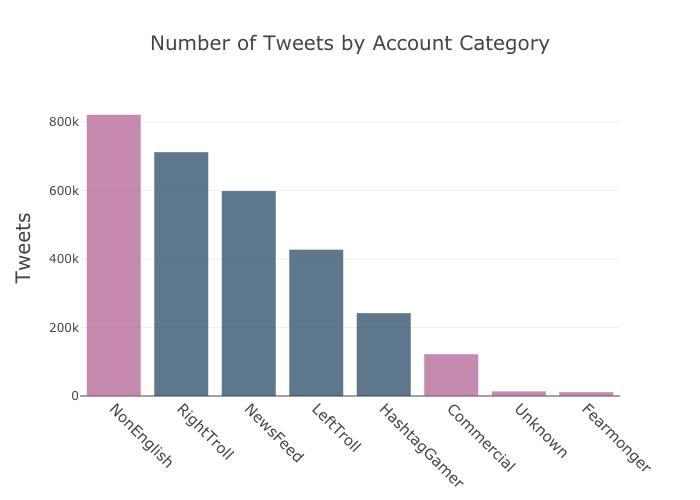

In [13]:
counts_by_type = dict(Counter(df.account_category))

account_type = list(counts_by_type.keys())
values = list(counts_by_type.values())

account_type = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values = sorted(values, reverse = True)

other_color = ['Unknown', 'Commercial', 'NonEnglish', 'Fearmonger']

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type,
            y=values,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of Tweets by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

img_bytes = pio.to_image(fig, format='png')
Image(img_bytes)

#iplot(fig, filename='basic-bar')

## Number of Tweets by Account Category (English-only Tweets)

In [14]:
counts_by_type = dict(Counter(dfEng.account_category))

account_type = list(counts_by_type.keys())
values = list(counts_by_type.values())

account_type = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values = sorted(values, reverse = True)

other_color = ['Unknown', 'Commercial', 'NonEnglish', 'Fearmonger']

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type,
            y=values,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of English Language Tweets by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

iplot(fig, filename='basic-bar')

## Number of Tweets by Account Category (Non-English Tweets)

In [15]:
counts_by_type = dict(Counter(dfOth.account_category))

account_type = list(counts_by_type.keys())
values = list(counts_by_type.values())

account_type = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values = sorted(values, reverse = True)

other_color = ['Unknown', 'Commercial', 'NonEnglish', 'Fearmonger']

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type,
            y=values,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Number of non-English Language Tweets by Account Category', font = dict(size = 20)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Tweets', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

iplot(fig, filename='basic-bar')

The previous chart displayed information for overall tweets. However, what we are really interested in is activity per account. That is, it would be nice to know how many right trolls are in the dataset vs. left trolls and so on. Let's go ahead and visualize this information now. 

In [16]:
account_analysis = df.groupby(['author', 'account_category'])['content'].count().reset_index()

account_analysis = Counter(account_analysis.account_category)

account_type = list(account_analysis.keys())
values = list(account_analysis.values())

account_type = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values = sorted(values, reverse = True)

color_list = ['rgb(175, 88, 141)' if i in other_color else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type,
            y=values,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Counts of Accounts by Category', font = dict(size = 30)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

iplot(fig, filename='basic-bar')

Ok, this is an interesting chart. While Non English tweets account for very little of the overall tweet volume, there is a sizable number of Non English accounts in the dataset. 

For our procedure to work, we need to make sure that we have enough information (tweets) for each account for doc2vec to appropriatly embed our text in a vector space. As such, we need to ensure that we only consider accounts that meet some threshold for a minimum number of tweets, which we we do below. 

In [17]:
# Let's get counts of the number of tweets by each author
counts_by_author = df[['author', 'content']].groupby('author').count()

counts_by_author.reset_index(inplace = True)

print(sum(counts_by_author.content > 400))

author_series = counts_by_author.author[counts_by_author.content > 400]

df = df[df.author.isin(author_series)]

1138


It should be noted that the choice of 400 tweets is arbitrary. Notice that by setting this threshold, the amount of Non English accounts in the dataset has decreased considerably. 

In [18]:
account_analysis = df.groupby(['author', 'account_category'])['content'].count().reset_index()
account_analysis = Counter(account_analysis.account_category)

account_type = list(account_analysis.keys())
values = list(account_analysis.values())

account_type = [x for _,x in sorted(zip(values ,account_type), reverse = True)]
values = sorted(values, reverse = True)

color_list = ['rgb(175, 88, 141)' if i == 'NonEnglish' else 'rgb(23,62,90)' for i in account_type]

data = [go.Bar(
            x=account_type,
            y=values,
            marker = dict(color = color_list),
            opacity = .7
    )]

layout = go.Layout(title = dict(text = 'Accounts with more than 400 Tweets', font = dict(size = 30)), 
                   xaxis = dict(
                       tickangle = 45, 
                       tickfont = dict(size = 15),
                       automargin = True),
                  yaxis = dict(title = dict(text = 'Accounts', font = dict(size = 20))))

fig = go.Figure(data = data, layout = layout)

iplot(fig, filename='basic-bar')